In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

os.chdir('..')

In [2]:
df = pd.read_csv('convert_MCMF_ALL_TIME_DATA.csv', sep = '\t')
df.head()

/var/folders/78/287t_xwn4jj_fts7vlrhv3z80000gq/T/ipykernel_61199/1887050971.py:1: DtypeWarning: Columns (14,28,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('convert_MCMF_ALL_TIME_DATA.csv', sep = '\t')


,IndexRow,Id,Logo Url,Program Name,Description,Org Name,Category Name,Capacity,Min Age,Max Age,...,Contact Email,Contact Phone,Program Price,Geographic Cluster Name,Program Pays Participants,Program Has Scholarships,Program Provides Transportation,Latitude,Longitude,Program Provides Free Food
0,"4,568",78752,NaN,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Academic Support,2000.0,7,15,...,recruitment@bbbschgo.org,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
1,"4,569",78752,NaN,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Work + Career,2000.0,7,15,...,recruitment@bbbschgo.org,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
2,"4,562",78749,https://cityoflearning-uploads.s3.amazonaws.co...,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,Academic Support,100.0,12,18,...,wchatman@ymenchicago.com,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
3,"4,563",78749,https://cityoflearning-uploads.s3.amazonaws.co...,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,Music & Art.,100.0,12,18,...,wchatman@ymenchicago.com,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
4,"4,557",78746,https://cityoflearning-uploads.s3.amazonaws.co...,Refugee Youth Career Pathways,Refugee Youth Career Pathways (RYCP) provides ...,RefugeeOne,Managing Money.,15.0,16,24,...,NaN,NaN,Free,NaN,Not Paid,YES,YES,NaN,NaN,False


In [3]:
df = df[["Org Name", "Description", "Program Url", "Start Date", "End Date", "Min Age", "Max Age", "Category Name", "Meeting Type", "Geographic Cluster Name", "Program Pays Participants", "Program Has Scholarships", "Program Provides Transportation", "Program Provides Free Food", "Program Price"]]
df.head()

,Org Name,Description,Program Url,Start Date,End Date,Min Age,Max Age,Category Name,Meeting Type,Geographic Cluster Name,Program Pays Participants,Program Has Scholarships,Program Provides Transportation,Program Provides Free Food,Program Price
0,Big Brothers Big Sisters,Community Based Mentoring is the traditional B...,https://bbbschgo.org/programs/,1/1/20,12/31/20,7,15,Academic Support,face_to_face,NEAR WEST SIDE,Not Paid,YES,YES,False,Free
1,Big Brothers Big Sisters,Community Based Mentoring is the traditional B...,https://bbbschgo.org/programs/,1/1/20,12/31/20,7,15,Work + Career,face_to_face,NEAR WEST SIDE,Not Paid,YES,YES,False,Free
2,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,http://www.ymenchicago.com,1/1/20,12/31/20,12,18,Academic Support,face_to_face,NORTH LAWNDALE,Not Paid,NO,NO,True,Free
3,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,http://www.ymenchicago.com,1/1/20,12/31/20,12,18,Music & Art.,face_to_face,NORTH LAWNDALE,Not Paid,NO,NO,True,Free
4,RefugeeOne,Refugee Youth Career Pathways (RYCP) provides ...,NaN,1/1/20,12/31/20,16,24,Managing Money.,face_to_face,NaN,Not Paid,YES,YES,False,Free


In [5]:
df['Program Price'].value_counts()

Free             37061
$50 or Less      32428
More Than $50    11790
Unknown           3599
Name: Program Price, dtype: int64

In [6]:
df['Program Price'] = df['Program Price'].map({'Free': 0, '$50 or Less': 1, 'More Than $50': 2, 'Unknown': 3})
df['Program Price'].value_counts()

0    37061
1    32428
2    11790
3     3599
Name: Program Price, dtype: int64

In [9]:
print(len(df['Category Name'].unique()))
df['Category Name'].unique()

28


array(['Academic Support', 'Work + Career ', 'Music & Art.',
       'Managing Money.', 'Helping Your Community.', 'Reading & Writing',
       'Sports + Wellness.', 'Computers.', 'Science ',
       'Building And Fixing Things', 'Computers', 'Performance.',
       'Helping Your Community', 'Science & Math', 'Food', 'Food.',
       'Building & Fixing Things', 'Reading & Writing.', 'Math',
       'Digital Media.', 'Nature.', 'Healthcare', 'Transportation',
       'Social Studies ', 'Teaching', 'Law', 'Customer/Human Service',
       nan], dtype=object)

In [3]:
# remove periods from category names
df['Category Name'] = df['Category Name'].str.replace('.', '')
# change + and & to And
df['Category Name'] = df['Category Name'].str.replace('+', '&')
df['Category Name'] = df['Category Name'].str.replace('And', '&')
print(len(df['Category Name'].unique()))
# sort alphabetically
df['Category Name'] = df['Category Name'].sort_values()
df['Category Name'].unique()

/var/folders/78/287t_xwn4jj_fts7vlrhv3z80000gq/T/ipykernel_61199/2404347054.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Category Name'] = df['Category Name'].str.replace('.', '')
/var/folders/78/287t_xwn4jj_fts7vlrhv3z80000gq/T/ipykernel_61199/2404347054.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Category Name'] = df['Category Name'].str.replace('+', '&')


23


array(['Academic Support', 'Work & Career ', 'Music & Art',
       'Managing Money', 'Helping Your Community', 'Reading & Writing',
       'Sports & Wellness', 'Computers', 'Science ',
       'Building & Fixing Things', 'Performance', 'Science & Math',
       'Food', 'Math', 'Digital Media', 'Nature', 'Healthcare',
       'Transportation', 'Social Studies ', 'Teaching', 'Law',
       'Customer/Human Service', nan], dtype=object)

In [4]:
# use standard capitalization for Geographic Cluster Name
df['Geographic Cluster Name'] = df['Geographic Cluster Name'].str.title()
df['Geographic Cluster Name'].unique()

array(['Near West Side', 'North Lawndale', nan, 'Roseland',
       'Lincoln Square', 'Bronzeville/South Lakefront', 'Grand Boulevard',
       'Kenwood', 'Washington Park', 'Morgan Park', 'Irving Park', 'Loop',
       'Austin', 'East Garfield Park', 'Garfield Park', 'Little Village',
       'West Garfield Park', 'South Chicago', 'Avalon Park', 'Riverdale',
       'Portage Park', 'Belmont Cragin', 'Edgewater', 'Uptown',
       'West Pullman', 'West Ridge', 'North Center', 'Jefferson Park',
       'Dunning', 'Logan Square', 'Rogers Park', 'Douglas',
       'Archer Heights', 'Armour Square', 'Washington Heights',
       'East Side', 'Near South Side', 'West Town', 'Back Of The Yards',
       'South Shore', 'Bridgeport', 'Lower West Side', 'Oakland',
       'Auburn Gresham', 'Fuller Park', 'Gage Park', 'Pullman',
       'Lake View', 'Greater Grand Crossing', 'Beverly', 'Clearing',
       'Englewood', 'Woodlawn', 'Ashburn', 'Near North Side', 'Hermosa',
       'Garfield Ridge', 'Lincoln Park

In [19]:
df.head()

,Org Name,Description,Program Url,Start Date,End Date,Min Age,Max Age,Category Name,Meeting Type,Geographic Cluster Name,Program Pays Participants,Program Has Scholarships,Program Provides Transportation,Program Provides Free Food,Program Price
0,Big Brothers Big Sisters,Community Based Mentoring is the traditional B...,https://bbbschgo.org/programs/,1/1/20,12/31/20,7,15,Academic Support,face_to_face,Near West Side,Not Paid,YES,YES,False,0
1,Big Brothers Big Sisters,Community Based Mentoring is the traditional B...,https://bbbschgo.org/programs/,1/1/20,12/31/20,7,15,Work & Career,face_to_face,Near West Side,Not Paid,YES,YES,False,0
2,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,http://www.ymenchicago.com,1/1/20,12/31/20,12,18,Academic Support,face_to_face,North Lawndale,Not Paid,NO,NO,True,0
3,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,http://www.ymenchicago.com,1/1/20,12/31/20,12,18,Music & Art,face_to_face,North Lawndale,Not Paid,NO,NO,True,0
4,RefugeeOne,Refugee Youth Career Pathways (RYCP) provides ...,NaN,1/1/20,12/31/20,16,24,Managing Money,face_to_face,NaN,Not Paid,YES,YES,False,0


In [5]:
print(df.shape)
df = df[df['Min Age'] <= 24]
print(df.shape)

(84878, 56)
(84585, 56)


In [22]:
df.to_csv('mcmf_cleaned.csv', index = False)

In [6]:
# number of programs in Morgan Park
df[df['Geographic Cluster Name'] == 'Morgan Park'].shape[0]

3309

distribution of categories

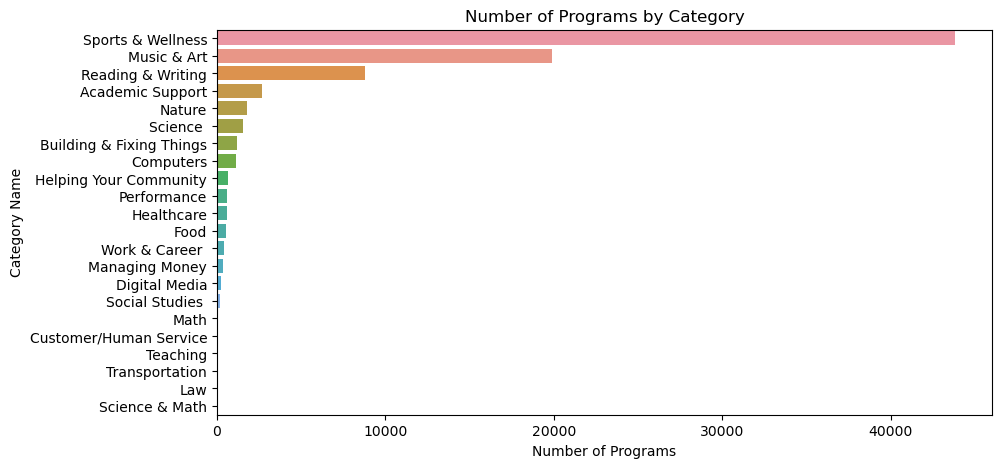

In [6]:
# bar chart for categories
plt.figure(figsize = (10, 5))
sns.countplot(y = 'Category Name', data = df, order = df['Category Name'].value_counts().index)
plt.title('Number of Programs by Category')
plt.xlabel('Number of Programs')
plt.ylabel('Category Name')
plt.show()
